# Lead Score Case Study

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from scipy import stats
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder


pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

# Read Data

In [2]:
xED_leads = pd.read_csv("Leads.csv")

In [3]:
# checking the first few data 
xED_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# shape of the dataset
xED_leads.shape

(9240, 37)

In [5]:
# checking all the columns in the dataset
xED_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
xED_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# chekcing the features and Null values in the dataset
xED_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looking at the above info, we can say that there are quite a few categorical variables present in the dataset for which we need to create dummy variables.
Also, we can see that there are lot of null values as well. We need to treat them accordingly. 

## Data Cleaning and Preparation

In [8]:
# checking the number of missing values in each column
xED_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Dropping all the columns where missing values are greater than 3000

for col in xED_leads.columns:
    if xED_leads[col].isnull().sum() > 3000:
        xED_leads.drop(col, 1, inplace=True)

In [10]:
# Checking the number of null values again

xED_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#checking value counts of "City" column
xED_leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [12]:
# dropping the column "City"
xED_leads.drop(['City'], axis = 1, inplace = True)

In [13]:
#checking value counts of "Country" column
xED_leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [14]:
# dropping the column 'Country'

xED_leads.drop(['Country'], axis = 1, inplace = True)

In [15]:
# Checking the percentage of missing values in each column

round(100*(xED_leads.isnull().sum()/len(xED_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [16]:
# Checking the number of null values again

xED_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [17]:
# Check the value counts of all the columns

for column in xED_leads:
    print(xED_leads[column].astype('category').value_counts())
    print('----------- ************** --------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
----------- ************** --------------
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
----------- ************** --------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------- ************** -----------

The columns "Lead Profile", "How did you hear about X Education", and "Specialization" has the level "Select". We will check these columns one by one

In [18]:
xED_leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [19]:
xED_leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [20]:
xED_leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
xED_leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [22]:
xED_leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [23]:
xED_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
# Dropping the null values present in the variable 'What matters most to you in choosing a course'

xED_leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [25]:
# Checking the number of null values again

xED_leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [26]:
xED_leads = xED_leads[~pd.isnull(xED_leads['What is your current occupation'])]

In [27]:
# Checking the number of null values again

xED_leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [28]:
# Dropping the null value rows in the column 'TotalVisits'

xED_leads = xED_leads[~pd.isnull(xED_leads['TotalVisits'])]

In [29]:
# Checking the null values again

xED_leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [30]:
# Dropping the null values rows in the column 'Lead Source'

xED_leads = xED_leads[~pd.isnull(xED_leads['Lead Source'])]

In [31]:
# Checking the number of null values again

xED_leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [32]:
# Dropping the null values rows in the column 'Specialization'

xED_leads = xED_leads[~pd.isnull(xED_leads['Specialization'])]

In [33]:
# Checking the number of null values again

xED_leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [34]:
print(len(xED_leads.index))
print(len(xED_leads.index)/9240)

6373
0.6897186147186147


In [35]:
# Looking at the dataset again

xED_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [36]:
xED_leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [37]:
xED_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Preparing the data for modelling

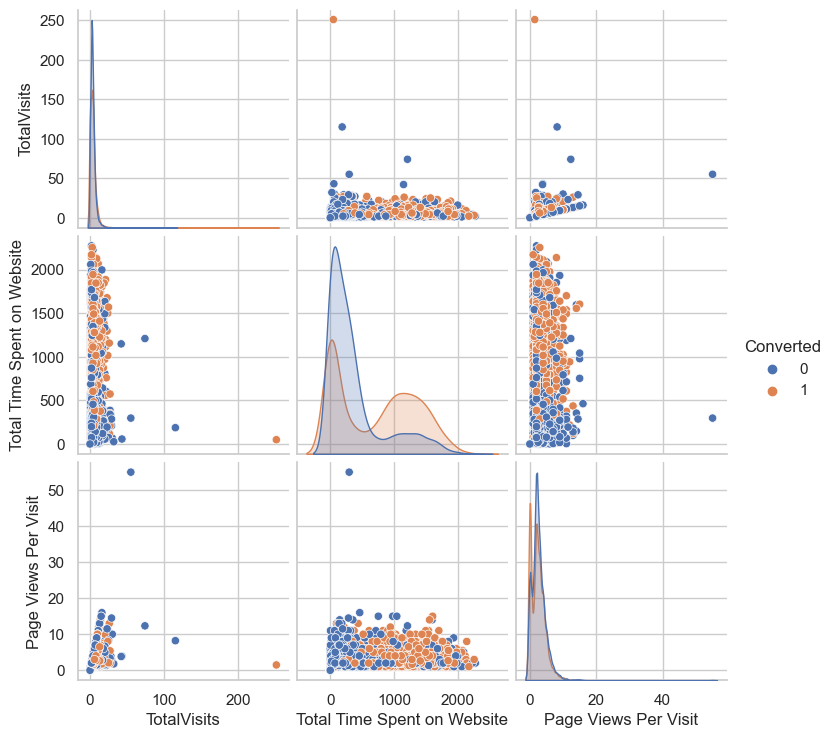

In [38]:
sns.pairplot(xED_leads,diag_kind='kde',hue='Converted')
plt.show()

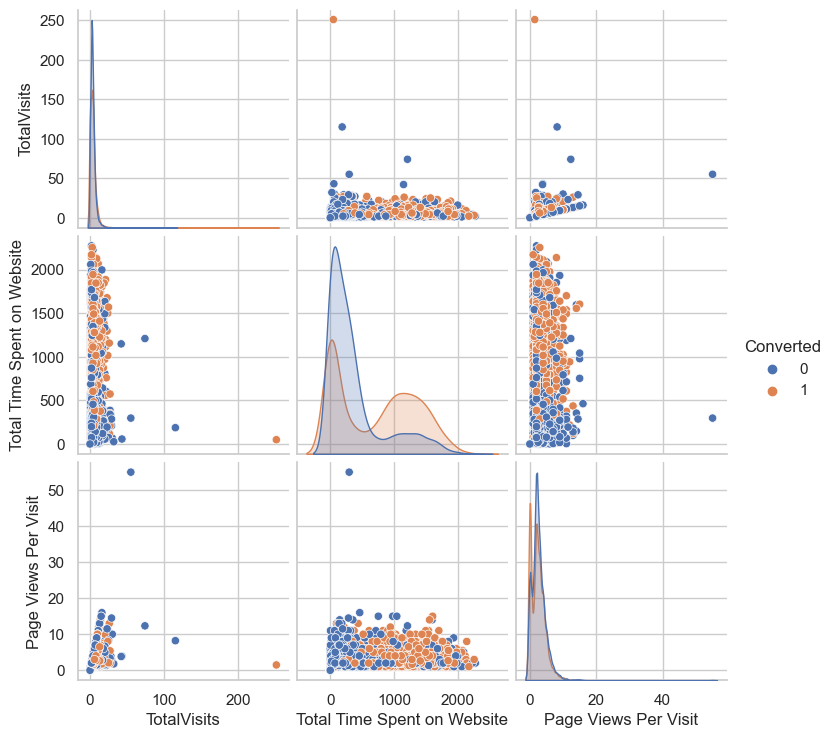

In [39]:
xEDU = xED_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(xEDU,diag_kind='kde',hue='Converted')
plt.show()

In [40]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedxEDU = pd.DataFrame(pt.fit_transform(xEDU))
transformedxEDU.columns = xEDU.columns
transformedxEDU.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


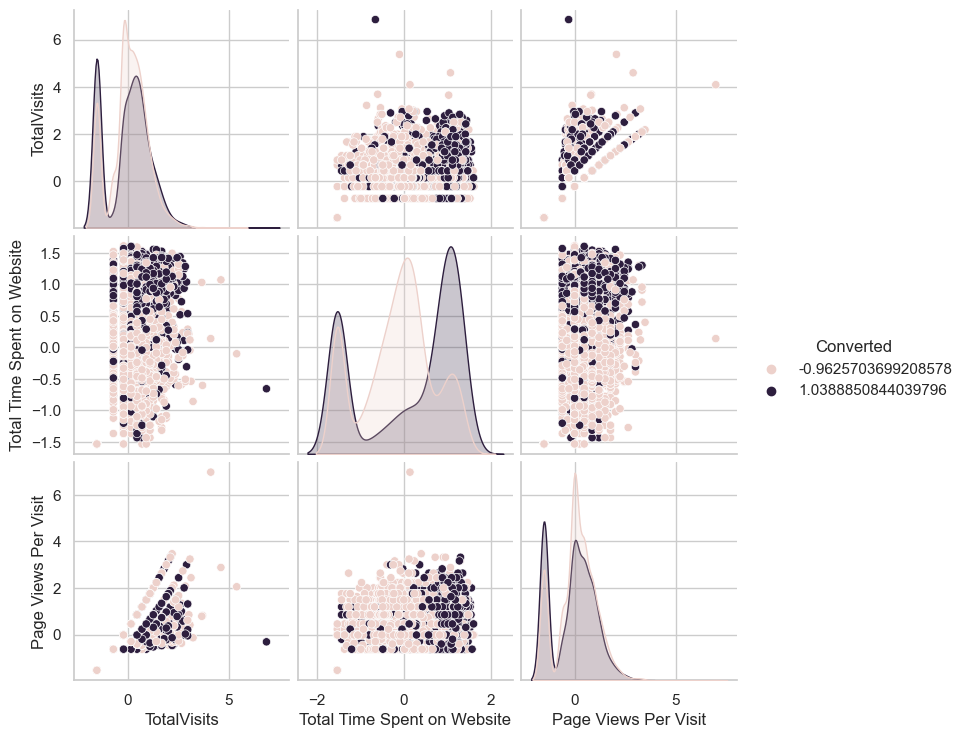

In [41]:
sns.pairplot(transformedxEDU,diag_kind='kde',hue='Converted')
plt.show()

### Dummy variable creation

In [42]:
# Check the columns which are of type 'object'

temp = xED_leads.loc[:, xED_leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [43]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(xED_leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
xED_leads = pd.concat([xED_leads, dummy], axis=1)

In [44]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is not of our use, so we drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(xED_leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
xED_leads = pd.concat([xED_leads, dummy_spl], axis = 1)

In [45]:
# Dropping the variables for which the dummy variables has been created

xED_leads = xED_leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [46]:
# Checking the dataset again

xED_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Test-Train Split

In [47]:
# Putting all the feature variables in X

X = xED_leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# Keeping the target variable in y

y = xED_leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
# Splitting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [50]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Building

In [51]:
logreg = LogisticRegression()

In [52]:
# Importing the 'RFE' and select 15 variables

rfe = RFE(logreg, step = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [53]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 2),
 ('Lead Source_testone', False, 3),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 4),

In [54]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [55]:
# Select only the columns selected by RFE

X_train = X_train[col]

## Model 1

In [56]:
# Fitting a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4423
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1978.9
Date:                Thu, 15 Feb 2024   Deviance:                       3957.8
Time:                        20:45:07   Pearson chi2:                 4.68e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4959      0.631     -0.786      0.432      -1.732       0.740
TotalVisits                                             12.8958      3.348      3.851      0.000       6.333      19.459
Total Time Spent on Website                              4.3832      0.189     23.160      0.000       4.012       4.754
Page Views Per Visit                                    -1.2260      0.455     -2.696      0.007      -2.117      -0.335
Lead Origin_Landing Page Submission                     -0.7950      0.123     -6.457      0.000      -1.036      -0.554
Lead Origin_Lead Add Form                                2.2182      1.172      1.892      0.058      -0.080       4.516
Lead Source_Olark Chat                                   1.1438      0.155      7.363      0.000       0.839       1.448
Lead Source_Reference                                    1.3148      1.193      1.102      0.270      -1.023       3.653
Lead Source_Welingak Website                             3.6811      1.542      2.387      0.017       0.659       6.703
Do Not Email_Yes                                        -1.3566      0.227     -5.966      0.000      -1.802      -0.911
Last Activity_Converted to Lead                         -0.5349      0.238     -2.250      0.024      -1.001      -0.069
Last Activity_Email Bounced                             -1.2784      0.674     -1.897      0.058      -2.599       0.042
Last Activity_Had a Phone Conversation                   1.3418      0.987      1.359      0.174      -0.593       3.277
Last Activity_Olark Chat Conversation                   -0.8223      0.201     -4.096      0.000      -1.216      -0.429
Last Activity_Page Visited on Website                   -0.3634      0.175     -2.072      0.038      -0.707      -0.020
Last Activity_SMS Sent                                   0.9465      0.090     10.485      0.000       0.770       1.123
What is your current occupation_Housewife               22.7588   2.37e+04      0.001      0.999   -4.64e+04    4.65e+04
What is your current occupation_Student                 -1.0434      0.655     -1.593      0.111      -2.327       0.241
What is your current occupation_Unemployed              -1.2139      0.615     -1.973      0.048      -2.420      -0.008
What is your current occupation_Working Professional     1.3469      0.644      2.090      0.037       0.084       2.610
Last Notable Activity_Email Bounced                      1.5722      0.807      1.948      0.051      -0.009       3.154
Last Notable Activity_Email Link Clicked                -0.5988      0.281     -2.130      0.033      -1.150      -0.048
Last Notable Activity_Had a Phone Conversation          22

## Checking `VIF`

In [57]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,84.71
6,Lead Source_Reference,65.38
7,Lead Source_Welingak Website,20.08
17,What is your current occupation_Unemployed,10.15
3,Lead Origin_Landing Page Submission,5.40
2,Page Views Per Visit,4.64
21,Last Notable Activity_Had a Phone Conversation,2.46
11,Last Activity_Had a Phone Conversation,2.46
1,Total Time Spent on Website,2.44
18,What is your current occupation_Working Professional,2.43


In [58]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

## Model 2

In [59]:
# Refitting the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4424
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1979.4
Date:                Thu, 15 Feb 2024   Deviance:                       3958.8
Time:                        20:45:07   Pearson chi2:                 4.66e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4954      0.631     -0.786      0.432      -1.731       0.740
TotalVisits                                             12.8947      3.348      3.851      0.000       6.332      19.458
Total Time Spent on Website                              4.3827      0.189     23.154      0.000       4.012       4.754
Page Views Per Visit                                    -1.2265      0.455     -2.697      0.007      -2.118      -0.335
Lead Origin_Landing Page Submission                     -0.7946      0.123     -6.454      0.000      -1.036      -0.553
Lead Origin_Lead Add Form                                3.4916      0.279     12.516      0.000       2.945       4.038
Lead Source_Olark Chat                                   1.1431      0.155      7.356      0.000       0.839       1.448
Lead Source_Welingak Website                             2.4069      1.038      2.318      0.020       0.372       4.442
Do Not Email_Yes                                        -1.3538      0.227     -5.961      0.000      -1.799      -0.909
Last Activity_Converted to Lead                         -0.5351      0.238     -2.251      0.024      -1.001      -0.069
Last Activity_Email Bounced                             -1.2812      0.674     -1.902      0.057      -2.602       0.039
Last Activity_Had a Phone Conversation                   1.3423      0.987      1.360      0.174      -0.593       3.277
Last Activity_Olark Chat Conversation                   -0.8221      0.201     -4.096      0.000      -1.216      -0.429
Last Activity_Page Visited on Website                   -0.3633      0.175     -2.072      0.038      -0.707      -0.020
Last Activity_SMS Sent                                   0.9462      0.090     10.483      0.000       0.769       1.123
What is your current occupation_Housewife               22.7608   2.37e+04      0.001      0.999   -4.65e+04    4.65e+04
What is your current occupation_Student                 -1.0423      0.655     -1.591      0.112      -2.326       0.241
What is your current occupation_Unemployed              -1.2138      0.615     -1.973      0.048      -2.419      -0.008
What is your current occupation_Working Professional     1.3479      0.644      2.092      0.036       0.085       2.611
Last Notable Activity_Email Bounced                      1.5723      0.807      1.948      0.051      -0.009       3.154
Last Notable Activity_Email Link Clicked                -0.5962      0.281     -2.123      0.034      -1.147      -0.046
Last Notable Activity_Had a Phone Conversation          22.4434   2.11e+04      0.001      0.999   -4.12e+04    4.13e+04
Last Notable Activity_Modified                          -0

In [60]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,What is your current occupation_Unemployed,10.14
3,Lead Origin_Landing Page Submission,5.40
2,Page Views Per Visit,4.64
20,Last Notable Activity_Had a Phone Conversation,2.46
10,Last Activity_Had a Phone Conversation,2.46
1,Total Time Spent on Website,2.43
17,What is your current occupation_Working Professional,2.43
4,Lead Origin_Lead Add Form,2.41
5,Lead Source_Olark Chat,2.26
21,Last Notable Activity_Modified,2.14


In [61]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

## Model 3

In [62]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4425
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1981.3
Date:                Thu, 15 Feb 2024   Deviance:                       3962.6
Time:                        20:45:08   Pearson chi2:                 4.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3915
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4994      0.631     -0.791      0.429      -1.736       0.737
TotalVisits                                             12.9208      3.345      3.863      0.000       6.364      19.477
Total Time Spent on Website                              4.3778      0.189     23.136      0.000       4.007       4.749
Page Views Per Visit                                    -1.2216      0.454     -2.689      0.007      -2.112      -0.331
Lead Origin_Landing Page Submission                     -0.7910      0.123     -6.430      0.000      -1.032      -0.550
Lead Origin_Lead Add Form                                3.4972      0.279     12.534      0.000       2.950       4.044
Lead Source_Olark Chat                                   1.1466      0.155      7.378      0.000       0.842       1.451
Lead Source_Welingak Website                             2.4061      1.038      2.317      0.021       0.371       4.442
Do Not Email_Yes                                        -1.3547      0.227     -5.966      0.000      -1.800      -0.910
Last Activity_Converted to Lead                         -0.5251      0.238     -2.210      0.027      -0.991      -0.059
Last Activity_Email Bounced                             -1.2720      0.674     -1.888      0.059      -2.593       0.049
Last Activity_Had a Phone Conversation                   2.5722      0.805      3.194      0.001       0.994       4.150
Last Activity_Olark Chat Conversation                   -0.8145      0.201     -4.058      0.000      -1.208      -0.421
Last Activity_Page Visited on Website                   -0.3610      0.175     -2.059      0.039      -0.705      -0.017
Last Activity_SMS Sent                                   0.9453      0.090     10.473      0.000       0.768       1.122
What is your current occupation_Housewife               21.7659   1.44e+04      0.002      0.999   -2.82e+04    2.82e+04
What is your current occupation_Student                 -1.0412      0.655     -1.589      0.112      -2.326       0.243
What is your current occupation_Unemployed              -1.2114      0.615     -1.968      0.049      -2.418      -0.005
What is your current occupation_Working Professional     1.3486      0.645      2.092      0.036       0.085       2.612
Last Notable Activity_Email Bounced                      1.5633      0.807      1.937      0.053      -0.019       3.145
Last Notable Activity_Email Link Clicked                -0.5988      0.281     -2.132      0.033      -1.149      -0.048
Last Notable Activity_Modified                          -0.6460      0.104     -6.223      0.000      -0.849      -0.443
Last Notable Activity_Unreachable                        2

In [63]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

## Model 4

In [64]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4426
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1983.8
Date:                Thu, 15 Feb 2024   Deviance:                       3967.6
Time:                        20:45:08   Pearson chi2:                 4.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3908
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1501      0.582      0.258      0.797      -0.991       1.292
TotalVisits                                             12.7766      3.335      3.831      0.000       6.241      19.312
Total Time Spent on Website                              4.3758      0.189     23.134      0.000       4.005       4.746
Page Views Per Visit                                    -1.2462      0.454     -2.743      0.006      -2.137      -0.356
Lead Origin_Landing Page Submission                     -0.7812      0.123     -6.357      0.000      -1.022      -0.540
Lead Origin_Lead Add Form                                3.4941      0.279     12.526      0.000       2.947       4.041
Lead Source_Olark Chat                                   1.1410      0.155      7.346      0.000       0.837       1.445
Lead Source_Welingak Website                             2.4035      1.038      2.314      0.021       0.368       4.439
Do Not Email_Yes                                        -1.3602      0.227     -5.983      0.000      -1.806      -0.915
Last Activity_Converted to Lead                         -0.5344      0.237     -2.250      0.024      -1.000      -0.069
Last Activity_Email Bounced                             -1.2750      0.674     -1.893      0.058      -2.595       0.045
Last Activity_Had a Phone Conversation                   2.5694      0.805      3.192      0.001       0.992       4.147
Last Activity_Olark Chat Conversation                   -0.8173      0.201     -4.074      0.000      -1.210      -0.424
Last Activity_Page Visited on Website                   -0.3793      0.175     -2.161      0.031      -0.723      -0.035
Last Activity_SMS Sent                                   0.9432      0.090     10.455      0.000       0.766       1.120
What is your current occupation_Student                 -1.6845      0.611     -2.757      0.006      -2.882      -0.487
What is your current occupation_Unemployed              -1.8538      0.568     -3.262      0.001      -2.967      -0.740
What is your current occupation_Working Professional     0.7062      0.600      1.178      0.239      -0.469       1.881
Last Notable Activity_Email Bounced                      1.5689      0.807      1.945      0.052      -0.012       3.150
Last Notable Activity_Email Link Clicked                -0.5981      0.280     -2.132      0.033      -1.148      -0.048
Last Notable Activity_Modified                          -0.6417      0.104     -6.191      0.000      -0.845      -0.439
Last Notable Activity_Unreachable                        2.3725      0.809      2.933      0.003       0.787       3.958
Specialization_Banking, Investment And Insurance         1

In [65]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

## Model 5

In [66]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4427
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1984.5
Date:                Thu, 15 Feb 2024   Deviance:                       3968.9
Time:                        20:45:08   Pearson chi2:                 4.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3906
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.7898      0.229      3.445      0.001       0.341       1.239
TotalVisits                                         12.7322      3.337      3.816      0.000       6.193      19.272
Total Time Spent on Website                          4.3758      0.189     23.132      0.000       4.005       4.747
Page Views Per Visit                                -1.2537      0.455     -2.758      0.006      -2.145      -0.363
Lead Origin_Landing Page Submission                 -0.7803      0.123     -6.350      0.000      -1.021      -0.539
Lead Origin_Lead Add Form                            3.4945      0.279     12.527      0.000       2.948       4.041
Lead Source_Olark Chat                               1.1409      0.155      7.346      0.000       0.836       1.445
Lead Source_Welingak Website                         2.4020      1.038      2.313      0.021       0.367       4.437
Do Not Email_Yes                                    -1.3620      0.228     -5.987      0.000      -1.808      -0.916
Last Activity_Converted to Lead                     -0.5258      0.237     -2.219      0.026      -0.990      -0.061
Last Activity_Email Bounced                         -1.2576      0.671     -1.874      0.061      -2.573       0.057
Last Activity_Had a Phone Conversation               2.5745      0.805      3.198      0.001       0.997       4.152
Last Activity_Olark Chat Conversation               -0.8131      0.200     -4.057      0.000      -1.206      -0.420
Last Activity_Page Visited on Website               -0.3892      0.176     -2.216      0.027      -0.733      -0.045
Last Activity_SMS Sent                               0.9466      0.090     10.503      0.000       0.770       1.123
What is your current occupation_Student             -2.3238      0.295     -7.868      0.000      -2.903      -1.745
What is your current occupation_Unemployed          -2.4932      0.191    -13.022      0.000      -2.868      -2.118
Last Notable Activity_Email Bounced                  1.5599      0.804      1.940      0.052      -0.016       3.136
Last Notable Activity_Email Link Clicked            -0.5950      0.280     -2.123      0.034      -1.144      -0.046
Last Notable Activity_Modified                      -0.6441      0.104     -6.214      0.000      -0.847      -0.441
Last Notable Activity_Unreachable                    2.3723      0.809      2.933      0.003       0.787       3.958
Specialization_Banking, Investment And Insurance     1.1866      0.224      5.292      0.000       0.747       1.626
Specialization_Business Administration               0.6207      0.197      3.157      0.002       0.235       1.006
Specialization_E-Business                

## Checking `VIF`

In [67]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,5.24
15,What is your current occupation_Unemployed,5.20
2,Page Views Per Visit,4.19
1,Total Time Spent on Website,2.22
9,Last Activity_Email Bounced,2.11
18,Last Notable Activity_Modified,2.09
4,Lead Origin_Lead Add Form,1.92
0,TotalVisits,1.89
5,Lead Source_Olark Chat,1.78
13,Last Activity_SMS Sent,1.78


## Model Evaluation

In [68]:
# Using 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.331916
218     0.094834
4171    0.054817
4037    0.362956
3660    0.968938
207     0.101067
2044    0.098495
6411    0.960314
6498    0.022302
2085    0.985125
dtype: float64

In [69]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.331916  , 0.09483405, 0.05481739, 0.36295562, 0.96893816,
       0.10106732, 0.09849452, 0.96031423, 0.02230166, 0.98512471])

## Creating a dataframe with the actual conversion flag and the predicted probabilities

In [70]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.331916
1,0,0.094834
2,1,0.054817
3,1,0.362956
4,1,0.968938


## Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [71]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [72]:
# Checking first few records
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.331916,0
1,0,0.094834,0
2,1,0.054817,0
3,1,0.362956,0
4,1,0.968938,1


## Creating `Confusion Matrix`

In [73]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1927  385]
 [ 524 1625]]


In [74]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7962340282447882


In [75]:
# Evaluating other metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# 'sensitivity' calculation

TP/(TP+FN)

0.7561656584457888

In [77]:
# 'specificity' calculation

TN/(TN+FP)

0.8334775086505191

## Optimal Cutoff
0.5 was just arbitrary to vaguely check the model performance. But in order to get good results, we need to optimise the threshold. So first let's plot an ROC curve to see AUC.

In [78]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

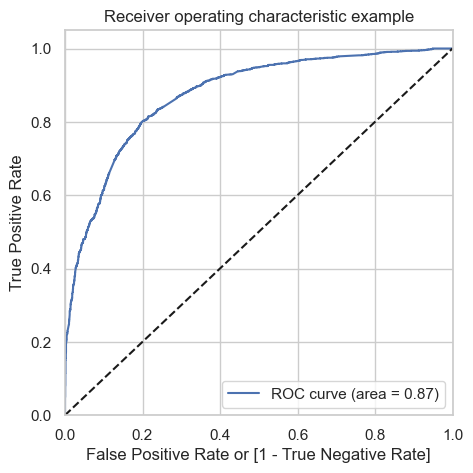

In [80]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [81]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.331916,0,1,1,1,1,0,0,0,0,0,0
1,0,0.094834,0,1,0,0,0,0,0,0,0,0,0
2,1,0.054817,0,1,0,0,0,0,0,0,0,0,0
3,1,0.362956,0,1,1,1,1,0,0,0,0,0,0
4,1,0.968938,1,1,1,1,1,1,1,1,1,1,1


In [82]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.585519  0.983713  0.215398
0.2   0.2  0.711724  0.951140  0.489187
0.3   0.3  0.770231  0.899023  0.650519
0.4   0.4  0.796234  0.817124  0.776817
0.5   0.5  0.796234  0.756166  0.833478
0.6   0.6  0.776508  0.657515  0.887111
0.7   0.7  0.748039  0.568637  0.914792
0.8   0.8  0.720018  0.465798  0.956315
0.9   0.9  0.662632  0.319218  0.981834


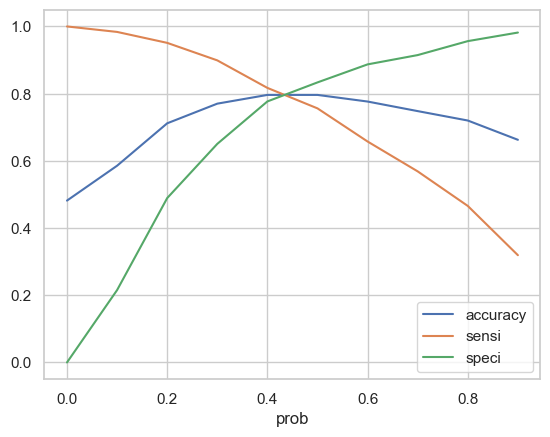

In [83]:
# Plotting the above values

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [84]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.331916,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.094834,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.054817,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.362956,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.968938,1,1,1,1,1,1,1,1,1,1,1,1


In [85]:
# Checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7978031831427931

In [86]:
# Creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1826,  486],
       [ 416, 1733]])

In [87]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [88]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.8064215914378781

In [89]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.7897923875432526

## Making Predictions on the Test Set

In [90]:
# Scaling the test set using 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [91]:
# Selecting the columns in X_train for X_test

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.0000,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0.4375,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9202,0.015936,0.416813,0.2500,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6570,0.011952,0.378961,0.1875,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2668,0.031873,0.395246,0.2500,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [92]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [93]:
# Checking X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,1.0,0.000000,0.000000,0.00000,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6122,1.0,0.027888,0.029049,0.43750,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9202,1.0,0.015936,0.416813,0.25000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6570,1.0,0.011952,0.378961,0.18750,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2668,1.0,0.031873,0.395246,0.25000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0.09375,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6583,1.0,0.011952,0.152289,0.18750,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0.87500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3056,1.0,0.011952,0.417694,0.18750,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [94]:
# Dropping the required columns from X_test 

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], 1, 
                                inplace = True)

In [95]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [96]:
y_test_pred[:10]

4771    0.997049
6122    0.126993
9202    0.706573
6570    0.331133
2668    0.580760
4233    0.901840
3368    0.790289
9091    0.437902
5972    0.206622
3631    0.772569
dtype: float64

In [97]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [98]:
# Let's see the head

y_pred_1.head()

,0
4771,0.997049
6122,0.126993
9202,0.706573
6570,0.331133
2668,0.580760


In [99]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [100]:
# Removing the index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [101]:
# Appendding y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [102]:
# Checking 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.997049
1,0,0.126993
2,0,0.706573
3,1,0.331133
4,1,0.580760


In [103]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [104]:
# Checking first few data of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997049
1,0,0.126993
2,0,0.706573
3,1,0.331133
4,1,0.580760


In [105]:
# Making predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [106]:
# Checking y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.997049,1
1,0,0.126993,0
2,0,0.706573,1
3,1,0.331133,0
4,1,0.580760,1


In [107]:
# Checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7819037656903766

In [108]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[775, 221],
       [196, 720]])

In [109]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [110]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7860262008733624

In [111]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7781124497991968

## Precision-Recall View

In [112]:
# Checking the Confusion Matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1927,  385],
       [ 524, 1625]])

## Precision = TP / (TP + FP)

In [113]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8084577114427861

## Recall = TP / (TP + FN)

In [114]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7561656584457888

## Precision and Recall tradeoff

In [115]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [116]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

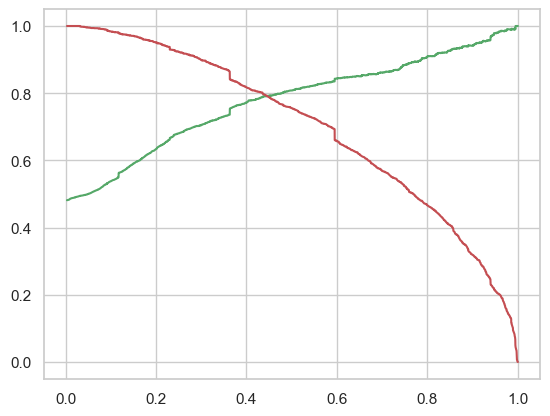

In [117]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.331916,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.094834,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.054817,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.362956,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.968938,1,1,1,1,1,1,1,1,1,1,1,1


In [119]:
# Checking the `accuracy`

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8002689979825152

In [120]:
# Creating the confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1860,  452],
       [ 439, 1710]])

In [121]:
# Let's evaluate the other metrics

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

## Precision

In [122]:
TP/(TP+FP)

0.7909343200740055

## Recall

In [123]:
TP/(TP+FN)

0.7957189390414147

## Making Predictions on the Test Set

In [124]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [125]:
y_test_pred[:10]

4771    0.997049
6122    0.126993
9202    0.706573
6570    0.331133
2668    0.580760
4233    0.901840
3368    0.790289
9091    0.437902
5972    0.206622
3631    0.772569
dtype: float64

In [126]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [127]:
# Checking the first few data

y_pred_1.head()

,0
4771,0.997049
6122,0.126993
9202,0.706573
6570,0.331133
2668,0.580760


In [128]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [129]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Appendding y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
# Checking the 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.997049
1,0,0.126993
2,0,0.706573
3,1,0.331133
4,1,0.580760


In [132]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [133]:
# Checking first few data of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997049
1,0,0.126993
2,0,0.706573
3,1,0.331133
4,1,0.580760


In [134]:
# Making predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [135]:
# Checking y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.997049,1
1,0,0.126993,0
2,0,0.706573,1
3,1,0.331133,0
4,1,0.580760,1


In [136]:
# Checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7887029288702929

In [137]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[798, 198],
       [206, 710]])

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Calculating the Precision

TP/(TP+FP)

0.7819383259911894

In [140]:
# Calculating Recall

TP/(TP+FN)

0.7751091703056768